In [1]:
import sys
print(sys.version)

3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


# main_code

注意事項  
- "_"を前につけてある関数等を書き換えると動作しなくなることがあるので、refarence等を読んでから書き換えるなどの操作をしてください。  
- ※Quit のボタンがありますがAnacondaのjupyter notebook だとwindow閉じることができずErrerが出ます、右上の✕で閉じてください。 Ubntu等のpythonで実行するときは使えます。

In [3]:
from tkinter import *
from tkinter import ttk
import tkinter.font

#Style_Setting=======================================
Style = ttk.Style()
Style.configure("M1.TFrame",background = "#6ac9f4")
Style.configure("User.TFrame",background = "#c7f9fd")
Style.configure("UseFrame.TLabelframe",background = "#fff")#親要素
Style.configure("UseFrame.TLabelframe.Label",background="#fff",foreground="#000")#子要素
Style.configure("FS4.TFrame",background = "#ebebeb")

Style.configure("ttkS.TLabel",background ="black",foreground = "white" )
#====================================================
class _MainFrame(Frame):
    def __init__(self,master=None):
        Frame.__init__(self,master)
        
        self.master.minsize(width = 320,height = 180)
        self.grid(sticky=N+S+E+W)
        self.name = StringVar()
        
        self.name = "GUI"#windowの名前
        #instances=====================================
        #==============================================
        self._MainSet()
        self._SetWidgets()
        
    def _SetWidgets(self):
        #define_widgets=========================================
        self._MakeFrame("sample")
        self._MakeFrame("F1")
        self.Switch_Frame("sample")
        
        self.sample.B = Button(self.sample,text = "apper F1",command=self.callF1)
        self.sample.B.grid(row=0,column=0)
        self.F1.B = Button(self.F1,text = "apper sample",command=self.callsample)
        self.F1.B.grid(row=0,column=0)
        #=======================================================
    def _MainSet(self):
        Top=self.winfo_toplevel()
        Top.configure(bg="")
        Top.grid_columnconfigure(0,weight=1)
        Top.grid_rowconfigure(2,weight=1)
        self.H1 = ttk.Frame(Top,padding=4)
        self.H1.grid(row=0,sticky=N+E+W+S)
        
        self.H1.grid_columnconfigure(0, weight=0)
        self.H1.grid_columnconfigure(1, weight=1)
        self.H1.grid_columnconfigure(2, weight=0)
        
        Name_Font = tkinter.font.Font(family = "Menlo",size = 16,weight = tkinter.font.BOLD)
        self.H1.Name = Label(self.H1,text = self.name,font = Name_Font).grid(row=0,column=0, sticky=E)
        self.H1.Text = Label(self.H1,text = "label",font = tkinter.font.Font(size = 10)).grid(row=0,column=1, sticky=W)
        self.H1.Quitbutton = Button(self.H1,text="Quit",command = self.quit).grid(row=0,column=2, sticky=W)
        
        self.M1 = ttk.Frame(Top,style = "M1.TFrame")
        self.M1.grid(row = 1,sticky=N+E+W+S)
        self.M1.count = 0
        
        self.UserFrame = ttk.Frame(Top,padding = [5,0],style ="User.TFrame" )
        self.UserFrame.grid(row = 2,column = 0,sticky = N+E+W+S)
        self.UserFrame.grid_rowconfigure(0, weight=1)
        self.UserFrame.grid_columnconfigure(0, weight=1)

    def _MakeFrame(self,name):
        self._OffPalse()
        code0 = "self."+ name + "= ttk.LabelFrame(self.UserFrame,style=\"UseFrame.TLabelframe\",text=\""+name+"\",padding=[0,5],relief=\"flat\")"
        code1 = "self."+ name + ".grid(row=0,column=0,sticky = N+E+W+S)"
        exec(code0)
        exec(code1)
        self._M1button(name)
    def _M1button(self,Frame):
        code0 = "self.M1."+Frame+"=Button(self.M1,text="+"\""+Frame+"\",command = self._combineFunc(self._OffPalse,self."+Frame+".grid))"
        code1 = "self.M1."+Frame+".grid(row = 0,column="+str(self.M1.count)+")"
        code2 = "self.M1."+Frame+".column="+str(self.M1.count)
        code3 = "self.M1."+Frame+".state=\"Appear\""
        code4 = "self.M1."+Frame+".freame=\"self.UserFrame."+Frame+"\""
        exec(code0)
        exec(code1)
        exec(code2)
        exec(code3)
        exec(code4)
        self.M1.count += 1
    def _OffPalse(self):
        widgetlist = self.UserFrame.grid_slaves()
        for wid in widgetlist:
            wid.grid_remove()
    def _combineFunc(self, *funcs):
       def combinedFunc(*args, **kwargs):
            for f in funcs:
                f(*args, **kwargs)
       return combinedFunc
    #User_commands1===================================
    def Switch_Frame(self,Frame):
        self._OffPalse()
        code0 = "self."+Frame+".grid()"
        exec(code0)
        
    def callF1(self):
        self.Switch_Frame("F1")
    def callsample(self):
        self.Switch_Frame("sample")
    #================================================


#User_commands2===================================
def test():
    print("test")
#================================================

_app = _MainFrame()
_app.master.title(_app.name)
_app.mainloop()

# Frameを作成する関数　_MakeFrame

基本構文  
self._MakeFrame("name")

name につけたい名前を入れるとそのフレームが作成される。(名前は基本何でもよいが、漢字、ひらがななどの全角文字(対応しているが使えない文字があるかも)、また、トークンとかぶると誤動作する可能性があります。)  
フレームの上に呼び出す用のボタンが作成される。

define_widgetsのところに書く、ここで定義するフレームに対してwidget(button や textなど)を紐づけていく。

In [ ]:
        self._MakeFrame("sample")

# widgetのサンプルを幾つか例示する。

- *1 はstyle_settingのところに張り付けると利用できる
- *2 はdefine_widgetsのところに張り付ける。
- *3 はUser_commands1のところに張り付ける。_MainFrame内の値を使う関数はここに書く方が扱いやすいと思います。(自分が利用したい関数などもここに書く)
- *4 はUser_commands2のところに張り付ける。(自分が利用したい関数などもここに書く)
- より詳しいoption等は、[reference](#reference)を参照してください。

## Button

基本構文  
w = Button(parent,option = "val",...)

主なoption

|option名|例文|説明等|
|-|-|-|
|text|text = "text"||
|command|command =func |ボタンを押したとき実行する関数を設定する。この時、ここで設定するのは、実行する関数、"command = func()"のようにすると、ここで関数が実行され、その値が呼び出される関数になる。関数に引数を与えたい場合は、class化するなどする必要がある。


"sample"という名前のフレームを作成し、そこに"Button1"を作成、その後"sample"の一行(row=0)一列目(column=0)に配置する。

*2

In [ ]:
        self._MakeFrame("sample")
        self.sample.Button1 = Button(self.sample,text="test",command=test)
        self.sample.Button1.grid(row=0,column=0)

*4

In [ ]:
def test():
    print("test")

### 複数の関数を呼び出したいとき

実行順序はfunc1 -> func2の順になる。

In [ ]:
command=self._combineFunc(func1,func2)

## text Label

基本構文  
w = Label(parent,option = "val",...)

主なoption

|option名|例文|説明等|
|-|-|-|
|text|text = "text"|文字表示|
|textvariable|textvariable =text |textvariableは"StringVar"で定義する。  textvariableの中身を決定するときは、w.set()、中身を取り出すときはx.get()で取り出せる。|

*2

In [ ]:
        self._MakeFrame("sample")
        self.sample.Label1 = Label(self.sample,text="test",command=test)
        self.sample.Label1.grid(row=0,column=0)

## Entry

基本構文  
w = Entry(parent,option = "val",...)

主なoption

|option名|例文|説明等|
|-|-|-|
|text|text = "text"||
|textvariable|textvariable =text |textvariableは"StringVar"で定義する。  textvariableの中身を決定するときは、w.set()、中身を取り出すときはx.get()で取り出せる。|


instanceにself.textを追加、StringVar()で定義しておく。

In [ ]:
        self.text = StringVar()

*2

In [ ]:
        self._MakeFrame("sample")
        self.sample.Entry1 = Entry(self.sample,textvariable=self.text,command=test)
        self.sample.Entry1.grid(row=0,column=0)
        
        #取得できたかどうかの確認用のButtan
        self.sample.Button2 = Button(self.sample,textvariable=self.text,command=self.textprint)
        self.sample.Button2.grid(row=0,column=1)

*3

In [ ]:
def textprint(self):
    print(self.sample.Entry1.get())

### Entryにスクロールバーをつけたいとき

*2

In [ ]:
        self.sample.entryScroll = Scrollbar(self.sample, orient=HORIZONTAL,command=self.__scrollHandler)
        self.sample.entryScroll.grid(row=1,column=0, sticky=E+W)#Entryの下に配置する。
        self.sample.Entry1['xscrollcommand'] = self.sample.entryScroll.set

*3

In [ ]:
    def __scrollHandler(self, *L):
        op, howMany = L[0], L[1]
        if op == 'scroll':
            units = L[2]
            self.sample.Entry1.xview_scroll(howMany, units)
        elif op == 'moveto':
            self.sample.Entry1.xview_moveto(howMany)

## Checkbutton

基本構文  
w = Checkbutton(parent, option=val, ...)  

w.get()及びw.set()で"True","False"のブール値を取得及び設定できる。  
w.select()でon状態にできる。  
w.toggle()でon,off状態を切り替えれる。

主なoption

|option名|例文|説明等|
|-|-|-|
|text|text = "text"|文字表示|
|command|command=func|クリックしたときに呼び出す関数|

*2

In [ ]:
        self._MakeFrame("sample")
        self.sample.CB = Checkbutton(self.sample, text = "on",command=test)
        self.sample.CB.grid(row=1,column=0, sticky=E+W)

*4

In [ ]:
def test():
    print("test")

## Frame

widgetの入れ物となれるもの、主にwidgetをまとめるときに用いる。あくまで枠なので、中身を設定しないと描画されない。

w = Frame(parent,option=val,...)

*2

In [ ]:
        self._MakeFrame("sample")
        self.sample.F = Frame(self.sample,bg="#E1ECF4")
        self.sample.F.grid(row=1,column=0, sticky=E+W)
        
        #中身
        self.T1 = Label(self.sample.F,text="sample").grid(row=0,column=0)
        self.B1 = Button(self.sample.F,text="button").grid(row=0,column=1,padx=10,pady=5)
        self.E1 = Entry(self.sample.F).grid(row=1,column=0)

以下、必要があれば追記します。

##  Listbox widget

文字の配列を表示できる。標準では10個まででそれ以上を表示する場合は、改変が必要。

w = Listbox(parent, option, ...)

## Menu widget

ドロップダウンメニューの作成

w = Menu(mb, option, ...)

##  Top-level menus

windowの上側に表示されるメニュー欄などの設定

In [ ]:
top = self.winfo_toplevel()
self.menuBar = tk.Menu(top)
top['menu'] = self.menuBar
self.subMenu = tk.Menu(self.menuBar)
self.menuBar.add_cascade(label='Help', menu=self.subMenu)
self.subMenu.add_command(label='About', command=self.__aboutHandler)

## Menubutton

In [ ]:
w = Menubutton(parent, option, ...)

In [ ]:
self.mb = tk.Menubutton(self, text='condiments',
relief=RAISED)
self.mb.grid()
self.mb.menu = tk.Menu(self.mb, tearoff=0)
self.mb['menu'] = self.mb.menu
self.mayoVar = tk.IntVar()
self.ketchVar = tk.IntVar()
self.mb.menu.add_checkbutton(label='mayo',
variable=self.mayoVar)
self.mb.menu.add_checkbutton(label='ketchup',
variable=self.ketchVar)

## The Message widget

メッセージウィンドウを表示する。

In [ ]:
w = Message(parent, option, ...)

##  The PanedWindow widget

In [ ]:
w = PanedWindow(parent, option, ...)

## The Scale widget

可変ボリュームの作成(ttk)

In [ ]:
 w = ttk.Scale(parent, option=value, ...)

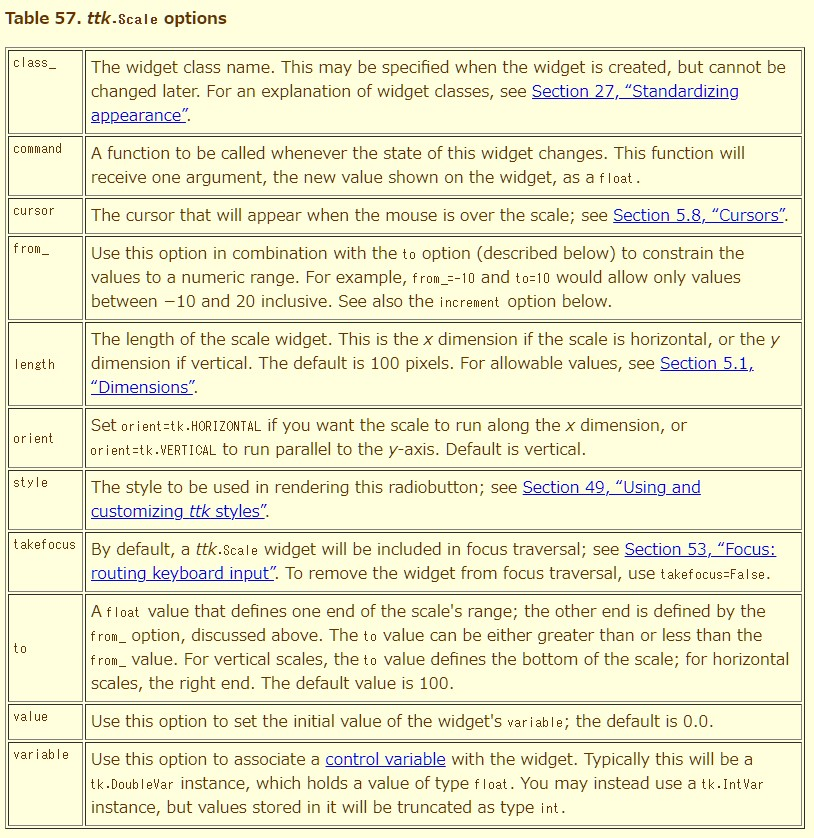

In [4]:
from tkinter import *
from tkinter import ttk
root = Tk()

num = IntVar()
text = StringVar()
ratelist = ["1/2",
           "1/3",
           "1/4",
           "1/5",
           "1/6"]

def ReFl(_):
    scalenum = num.get()
    if scalenum > 0:
        text.set(ratelist[scalenum-1])
    else:
        text.set(f"{scalenum+1}")

root.f =Scale(root,
                  length = 1000,
                  variable = num,
                  orient=HORIZONTAL,
                  takefocus=False,
                  resolution=1,
                  showvalue =False,
                  from_=-5,
                  to=5,
                 command=ReFl)


root.t = Label(root,textvariable = text)

root.f.grid()
root.t.grid()
root.mainloop()

# 便利関数例

## Switch_Frame フレームの切り替え関数

呼び出したいフレームの名前を引数に与えれば、そのフレーム(_MakeFrameで作ったフレーム)を呼び出すことが出来る。

*3

In [ ]:
    def Switch_Frame(self.Frame):
        self._OffPalse
        code0 = "self."+Frame+".grid"
        exec(code0)
    #buttonのcommandでは引数を与えられないのでbuttanで使うときは、それぞれ以下のような関数を作成して呼び出してください。  
    def callF1(self):
        Switch_Frame("F1")

使用例

初めにsampleのフレームを表示し、ボタンが押されるとF1に切り替わる。

*2

In [ ]:
        self._MakeFrame("sample")
        self._MakeFrame("F1")
        self.Switch_Frame("sample")
        
        self.sample.B = Button(self.sample,text = "apper F1",command=self.callF1)
        self.sample.B.grid(row=0,column=0)
        self.F1.B = Button(self.F1,text = "apper sample",command=self.callsample)
        self.F1.B.grid(row=0,column=0)

*3

In [ ]:
    def Switch_Frame(self,Frame):
        #self._OffPalse()
        code0 = "self."+Frame+".grid()"
        exec(code0)
        
    def callF1(self):
        self.Switch_Frame("F1")
    def callsample(self):
        self.Switch_Frame("sample")

_MakeFrame のself._M1button(name)を以下のようにコメントアウトすれば、動作チェック用のボタンの表示を消せます。

In [ ]:
    def _MakeFrame(self,name):
        self._OffPalse()
        code0 = "self."+ name + "= ttk.LabelFrame(self.UserFrame,style=\"UseFrame.TLabelframe\",text=\""+name+"\",padding=[0,5],relief=\"flat\")"
        code1 = "self."+ name + ".grid(row=0,column=0,sticky = N+E+W+S)"
        exec(code0)
        exec(code1)
        #self._M1button(name)

## ディレクトリパスの取得

# 配置について

tk でのwidgetの配置方法（ジオメトリーマネージャ）は３つある。  
1つ目が行と列を決め、その何行何列目に配置するのか決める .grid()  
2つ目が直接親となるところに１次元的に配置する .pack()  
3つ目が親の左上の座標を原点とし、座標で設定する .place()  

このプログラムでは、全体の親となる"_MainFrame"を.grid()で表示しており、複数を併用すると、混乱を招くので主に.grid()での配置法について記す。

## .grid()

基本構文
w.grid(option=val,...)

option 一覧　[[1]](#1)

|option |説明 |例文|
|-|-|-|
|column	    |配置する列です。|column=0|
|row	    |配置する行です。|row = 1|
|columnspan	|何列にわたって配置するかを指定します。デフォルトは 1 です。|columnspan=2|
|rowspan	|何行にわたって配置するかを指定します。デフォルトは 1 です。|rowspan=3|
|padx	    |外側の横の隙間(px値)を指定します。|padx=10|
|pady	    |外側の縦の隙間(px値)を指定します。|pady=10|
|ipadx	    |内側の横の隙間(px値)を指定します。|ipadx=10|
|ipady	    |内側の縦の隙間(px値)を指定します。|ipady=10|
|sticky	    |どこに寄せるのか決める。|sticky = N,sticky = N+S|

### row column

何行何列目に配置するか0行0列目から整数値で設定できる。

### rowspan columnspan

row columnで設定したところから何行分何列分を範囲とするのか決めることができる。  
.grid(row = 2,column =1,rowspan = 3,columnspan=3)  
とすると、2～4行1～3列、3x3の範囲をまとめることができる。

幅を決めるだけなので、上記のように書いたうえで別のwidgetを  
.grid(row=3,column=3)  
で配置した場合上に重ねて表示される。

### padx padx

widgetの外側にどれくらいの空白を与えるのかｐｉｘｅl値で設定できる。

### ipadx ipadx

widgetの内側にどれくらいの空白を与えるのかｐｉｘｅl値で設定できる。

button1は、
.grid(padx=10,pady=5)  
で配置し、  
burron2は、
.grid(ipadx=10,ipady=5)  
で配置したときのボタンの表示↓（分かりやすいように背景は青にしている）

![image.png](attachment:image.png)

### sticky

(上から右回りに北東南西”NWSE”組み合わせて、NE,SW)に寄せるのか決められる。  
“N　E　W　S　NE　NW　SE　SW”はtkinter で定義されているので、from tkinter import tk のように書いたときは、tk.N,tk.SE　のように記述しないといけない。”N+E”の様に書くことも出来る。(本文では、"from tkinter import *"でtkを省略しています。)


## grid の詳細設定

配置には関係しないが、何か動作したときに表示から消したりするときの方法など、

以下の文中のwはwigetを指します。

### w.grid_info()
 wがどんなものなのか、wの行と列,ipadx,ipady、padx,pady,stickyの値を辞書型のデータで取得できる。(self.B1.grid_info())

### w.grid_forget() (self.B1.info())
 wを表示から消す。.grid()がもう一度読まれると、再び表示されるが、前のrow,columnなどの値はJ保持しない（忘れる）(self.B1.forget())

### w.grid_remove()
 wを表示から消す。.grid()がもう一度よまれると、前のrow,columnの値のまま、前と同じように表示される。(self.B1.grid_remove())

### w.grid_slaves()
 wの中にあるwigetの一覧を取得できる。grid_slaves(row=2),grid_slsves(column=0)の様に指定すれば、その行、列内にあるwiget一覧を取得できる。

### w.columnconfigure(N,opution=value,…), w.rowconfigure(N,opution=value,…)
　N列(行)目に対して、以下に示す設定が出来る。

option一覧

#### minsize
top-lebel-windowを縮小したとき、行(列)の最小の幅をpx値で設定できる。（デフォルト）

#### pad 
行（列）の幅は基本その行(列)内にあるwigetの最大の大きさに依存するが、それに加えて余白を追加できる。(self.columnconfigure(2,pad=10))
pad = [1,10],pad=[3,4,5,4]のように書くと左右と上下、左、上、右、下それぞれ設定できる。

#### weight
行(列)がどの程度top-lebel-windowの大きさ変更に追従するのかを決めれる、（大きさを可変にするには少し書き方の工夫がいる。次項に例を示す。）二つの行に対しこのオプションをつけたとき、1行目には”weight=1”二行目には”weight=2”と書いたとき、余った幅を一行目に3分の1、二行目に3分の2に分配する。このオプションをつけていないものの大きさは変化しない。

## .pack()

基本構文  
w.pack(option=val,...)

option一覧 [[1]](#1)

|option| 説明|
|-|-|
|anchor|	配置可能なスペースに余裕がある場合、Widget をどこに配置するか指定します。デフォルトは Tk.CENTER. stikyと同じものを使える。|
|expand|	親 widget が大きくなったとき、大きくなるかどうかを指定します。 1 を指定すると大きくなり、0 だとなりません。デフォルトは 0|
|fill	|widget が空いているスペースを埋めるかどうか指定します： Tk.NONE, 元のサイズを保持します。 Tk.X, 横に広がります。 Tk.Y, 縦に広がります。 Tk.BOTH, 縦横に広がります。|
|padx	|外側の横の隙間を指定します。|
|pady	|外側の縦の隙間を指定します。|
|ipadx|	内側の横の隙間を指定します。|
|ipady|	内側の縦の隙間を指定します。|
|side	|どの方向からつめていくかを指定します：Tk.TOP (default), 上からつめます。 Tk.LEFT, 左からつめます。Tk.RIGHT, 右からつめます。Tk.BOTTOM, 下からつめます。|

# Style の書き方

## fontset

### 使用できるフォントファミリーの確認

In [ ]:
import tkinter as tk
import tkinter.font as font

root = tk.Tk()
print(list(font.families()))

['System', '@System', 'Terminal', '@Terminal', 'FixedSys', '@FixedSys', 'Modern', 'Roman', 'Script', 'Courier', 'MS Serif', 'MS Sans Serif', 'Small Fonts', '@Small Fonts', 'Marlett', 'Arial', 'Arabic Transparent', 'Arial Baltic', 'Arial CE', 'Arial CYR', 'Arial Greek', 'Arial TUR', 'Arial Black', 'Bahnschrift Light', 'Bahnschrift SemiLight', 'Bahnschrift', 'Bahnschrift SemiBold', 'Bahnschrift Light SemiCondensed', 'Bahnschrift SemiLight SemiConde', 'Bahnschrift SemiCondensed', 'Bahnschrift SemiBold SemiConden', 'Bahnschrift Light Condensed', 'Bahnschrift SemiLight Condensed', 'Bahnschrift Condensed', 'Bahnschrift SemiBold Condensed', 'Calibri', 'Calibri Light', 'Cambria', 'Cambria Math', 'Candara', 'Candara Light', 'Comic Sans MS', 'Consolas', 'Constantia', 'Corbel', 'Corbel Light', 'Courier New', 'Courier New Baltic', 'Courier New CE', 'Courier New CYR', 'Courier New Greek', 'Courier New TUR', 'Ebrima', 'Franklin Gothic Medium', 'Gabriola', 'Gadugi', 'Georgia', 'Impact', 'Ink Free', '

## フォントの指定方法

In [ ]:
root = Tk()

Name_Font = tkinter.font.Font(family = "System",size = 16,weight = tkinter.font.BOLD,slant="italic")
L = Label(root,text = "text",font = Name_Font).grid(row=0,column=0, sticky=E)

root.title("rootwin")

root.mainloop()


## 色の定義

カラーコードで色を設定でき、4ビット8ビット12ビットに対応しています。  
#rgb  
#rrggbb  
#rrrgggbbb  

いくつかの色は、名前でも設定できます。  
  
“black”,”white”,”green”,”blue”,”yellow”,”cyan”,”magenta”,”lightgreen”,etc.  

## tkのStyle 設定

tk(tool kit)のwidgetのスタイルの変更法  
option として設定できる。(htmlと同じ手法)

tkのstyle option一覧（一部のみ、すべてのwidgetが対応しているもの、そのwidget固有の物などがあるため、詳しくはreferenceを参照してください）

|opttion |説明|
|-|-|
|bg or background      |Normal background color.|
|fg or foreground      |Normal foreground (text) color.|
|font                  |Text font to be used for the button's label.|
|highlightbackground   |Color of the focus highlight when the widget does not have focus.|
|highlightcolor        |The color of the focus highlight when the widget has focus.|
|highlightthickness    |Thickness of the focus highlight.|

例　黒地に白色の文字のテキスト

*2

In [ ]:
        self.sample.Label1 = Label(self.sample,text="white",bg="black",fg="white")
        self.sample.Label1.grid(row=0,column=0)

In [ ]:
        self.sample.Label1 = Label(self.sample,text="white",bg="#000",fg="#fff")
        self.sample.Label1.grid(row=0,column=0)

## ttkのStyle設定

ttk(themed tool kit)のwidgetのスタイルの変更法、  
名前の”theme”とあるように、色やフォントに名前を付けて呼び出すことでスタイルを変更する。（CSSと同じ手法）

styleのoption一覧(一部)

基本構文  
S = ttk.Style()  
S.configure("sefname.TButton",option = val,...)

   w = widget(style = "sefname.TButton")

変数"S"は自由に決める。windowごとにテーマを変えるなら、それぞれのclassのインスタンスとして設定すると扱いやすい。  

S.configre(A.B,option = val)  

A.B　：呼び出すときの名前  
Aは自由に決めることができる。  
Bは旧名、以下の表(『Tkinter 8.5 reference: aGUI for Python』(John W.Shipman)より引用)の対応するものにするとよい。  

(実際対応してなくても問題なかったりする。(FrameのStyleにBtn.TButtonを呼び出しても使える。公式リファレンスでもあまり触れられず、あやふやな定義だったので、深く考えなくてもいいと思います。))


| Widget class | Style name |
|-|-|
| Button | TButton |
| Checkbutton | TCheckbutton |
| Combobox | TCombobox |
| Entry | TEntry |
| Frame | TFrame |
| Label | TLabel |
| LabelFrame | TLabelFrame |
| Menubutton | TMenubutton |
| Notebook | TNotebook |
| PanedWindow | TPanedwindow (not TPanedWindow!) |
| Progressbar| Horizontal.TProgressbar or Vertical.TProgressbar, depending on the orient option. |
| Radiobutton | TRadiobutton |
| Scale | Horizontal.TScale or Vertical.TScale, depending on the orient option. |
| Scrollbar | Horizontal.TScrollbar or Vertical.TScrollbar, dependingon the orient option. |
| Separator| TSeparator |
| Sizegrip | TSizegrip |
| Treeview | Treeview (not TTreview!) |

例　黒地に白色の文字のテキスト

*1

In [ ]:
Style = ttk.Style()
Style.configure("ttk.TLabel",background ="black",foreground = "white" )

*2

In [ ]:
        self.sample.Label1 = ttk.Label(self.sample,text="black?",style="ttk.TLabel")
        self.sample.Label1.grid(row=0,column=0)

# 備考

jpyterNoteBook の便利な拡張機能のダウンロード （Anaconda環境の時、ほかの環境は検索してみてください。）  
索引追加などが出来る。  
wasjupyterアップデート https://mebee.info/2020/11/01/post-21852/#outline__3  
nbextensionsのダウンロード　https://qiita.com/shilabo/items/a36c2919bdca2aa97623  
使い方　https://qiita.com/simonritchie/items/d7dccb798f0b9c8b1ec5  

# 参考 引用元

『Tkinter  8.5 reference: a GUI for python』(john W.Shipman 2013/12/31)
<a id='reference'></a>  
https://anzeljg.github.io/rin2/book2/2405/docs/tkinter/index.html

上記referenceの初め数項を簡単に意訳追記したもの　tkinter_reference日本語意訳.docx

[1]「紫藤のページ」  
<a id ='1'></a>
https://www.shido.info/py/tkinter2.html

# python コードで書き出しする時

utf-8で読まれるように、"# -*- coding:utf-8 -*-" と一文書き足しておくことをおすすめします。

In [ ]:
# -*- coding:utf-8 -*-

#main_code を貼り付ける。（呼び出し部_app以下は書き換える。）

if __name__ = "__main__":
    _app = _MainFrame()
    _app.master.title(_app.name)
    _app.mainloop()

## メモ

pythonコードをターミナルなどで呼び出すとき、デフォルトでは、標準の何もパッケージがないpythonが呼び出される。使いたい環境を指定するときには、コードのはじめに#!/user/bin/env python ~と書くがこれを"シェバン"や"シバン"(正確には"shebang")と言うらしい。

使うときは、#-*- coding:utf-8 -*-　の直下に以下のように追記する。(windowsなどlinux以外のosを使うときは/userから始まるものにするといいらしい)

In [3]:
#!/user/Guis/bin/env python3 # 使いたい環境のディレクトリ指定仮想環境など
#!python3.7 # 使用したいpython のバージョン

# キャプチャ

In [ ]:
import tkinter
import cv2
import PIL.Image, PIL.ImageTk
import time

class App:
    def __init__(self, window, window_title, video_source=1):
        self.window = window
        self.window.title(window_title)
        self.video_source = video_source

        # open video source (by default this will try to open the computer webcam)
        self.vid = MyVideoCapture(self.video_source)

        # Create a canvas that can fit the above video source size
        self.canvas = tkinter.Canvas(window, width = self.vid.width, height = self.vid.height)
        self.canvas.pack()

        # Button that lets the user take a snapshot
        self.btn_snapshot=tkinter.Button(window, text="Snapshot", width=50, command=self.snapshot)
        self.btn_snapshot.pack(anchor=tkinter.CENTER, expand=True)

        # After it is called once, the update method will be automatically called every delay milliseconds
        self.delay = 15
        self.update()

        self.window.mainloop()

    def snapshot(self):
        # Get a frame from the video source
        ret, frame = self.vid.get_frame()

        if ret:
            cv2.imwrite("frame-" + time.strftime("%d-%m-%Y-%H-%M-%S") + ".jpg", cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

    def update(self):
        # Get a frame from the video source
        ret, frame = self.vid.get_frame()

        if ret:
            self.photo = PIL.ImageTk.PhotoImage(image = PIL.Image.fromarray(frame))
            self.canvas.create_image(0, 0, image = self.photo, anchor = tkinter.NW)

        self.window.after(self.delay, self.update)


class MyVideoCapture:
    def __init__(self, video_source=0):
        # Open the video source
        self.vid = cv2.VideoCapture(video_source)
        if not self.vid.isOpened():
            raise ValueError("Unable to open video source", video_source)

        # Get video source width and height
        self.width = self.vid.get(cv2.CAP_PROP_FRAME_WIDTH)
        self.height = self.vid.get(cv2.CAP_PROP_FRAME_HEIGHT)

    def get_frame(self):
        if self.vid.isOpened():
            ret, frame = self.vid.read()
            if ret:
                # Return a boolean success flag and the current frame converted to BGR
                return (ret, cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            else:
                return (ret, None)
        else:
            return (ret, None)

    # Release the video source when the object is destroyed
    def __del__(self):
        if self.vid.isOpened():
            self.vid.release()

# Create a window and pass it to the Application object
App(tkinter.Tk(), "Tkinter and OpenCV")